## **1. Tải bộ dữ liệu**


In [1]:
!gdown --id 1-2z8eDpuE1qpnzFr9W8aKrrrctt9LST0

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-2z8eDpuE1qpnzFr9W8aKrrrctt9LST0
To: /content/fer_2013.zip
100% 64.1M/64.1M [00:00<00:00, 74.0MB/s]


In [2]:
!unzip fer_2013.zip 

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 extracting: fer_2013/train/angry/Training_25806207.jpg  
 extracting: fer_2013/train/angry/Training_61140206.jpg  
 extracting: fer_2013/train/angry/Training_24737960.jpg  
 extracting: fer_2013/train/angry/Training_41062954.jpg  
 extracting: fer_2013/train/angry/Training_62704105.jpg  
 extracting: fer_2013/train/angry/Training_84772308.jpg  
 extracting: fer_2013/train/angry/Training_52788224.jpg  
 extracting: fer_2013/train/angry/Training_55923353.jpg  
 extracting: fer_2013/train/angry/Training_71282551.jpg  
 extracting: fer_2013/train/angry/Training_39764127.jpg  
 extracting: fer_2013/train/angry/Training_9436506.jpg  
 extracting: fer_2013/train/angry/Training_72989732.jpg  
 extracting: fer_2013/train/angry/Training_47170134.jpg  
 extracting: fer_2013/train/angry/Training_83320847.jpg  
 extracting: fer_2013/train/angry/Training_12513174.jpg  
 extracting: fer_2013/train/angry/Training_51002390.jpg  
 extracting: fer

## **2. Đọc bộ dữ liệu**

### 2.1. Import các thư viện cần thiết

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

### 2.2. Khai báo các biến chứa dữ liệu train và val

In [4]:
fer2013_path = './fer_2013' # Đường dẫn đến folder dataset
train_fer2013_path = os.path.join(fer2013_path, 'train') # Đường dẫn đến folder dataset train
val_fer2013_path = os.path.join(fer2013_path, 'val') # Đường dẫn đến folder dataset val

BATCH_SIZE = 32
IMG_HEIGHT = 64
IMG_WIDTH = 64
RANDOM_SEED = 1

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_fer2013_path, # Đường dẫn đến bộ train
    seed=RANDOM_SEED, # Cài đặt random seed cho việc shuffle và các phép transform (nếu có)
    image_size=(IMG_HEIGHT, IMG_WIDTH), # Cài đặt kích thước ảnh
    shuffle=True, # Bật chế độ shuffle dataset
    batch_size=BATCH_SIZE, # Cài đặt batch size
    color_mode='grayscale' # Đọc ảnh theo định dạng ảnh mức xám
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_fer2013_path, # Đường dẫn đến bộ val
    seed=RANDOM_SEED, # Cài đặt random seed cho các phép transform (nếu có)
    image_size=(IMG_HEIGHT, IMG_WIDTH), # Cài đặt kích thước ảnh
    batch_size=BATCH_SIZE, # Cài đặt batch size
    color_mode='grayscale' # Đọc ảnh theo định dạng ảnh mức xám
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


### 2.3. Visualize một số mẫu dữ liệu

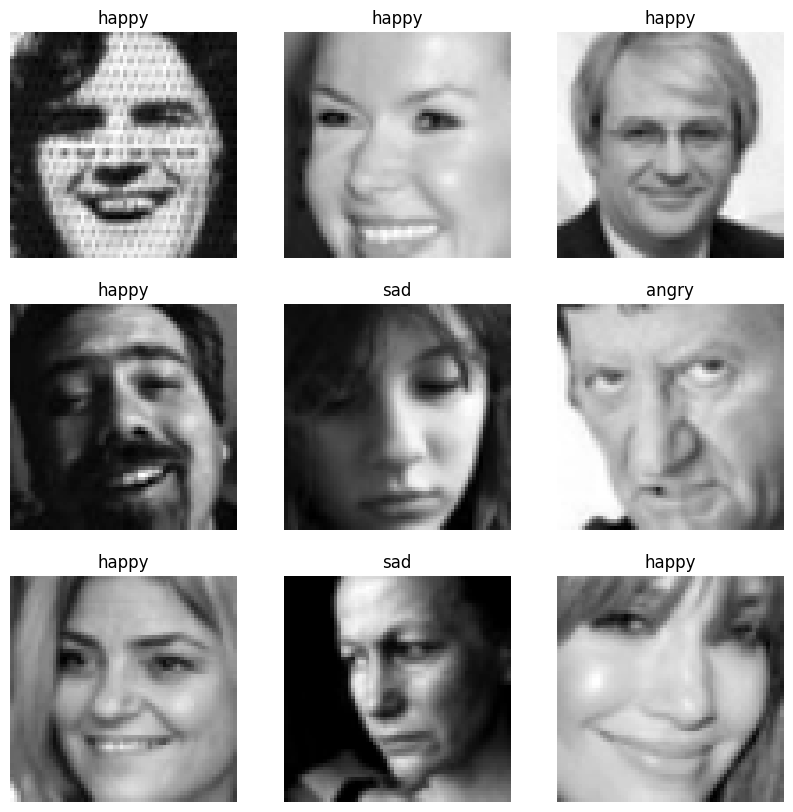

In [5]:
class_names = train_ds.class_names # Lấy danh sách tên của các class trong bộ dữ liệu
n_classes = len(class_names) # Lấy số lượng class

plt.figure(figsize=(10, 10)) # Cài đặt kích thước khung hình
for images, labels in train_ds.take(1): # Duyệt qua 1 batch của bộ train
    for i in range(9): # Duyệt qua 9 mẫu dữ liệu trong 1 batch
        ax = plt.subplot(3, 3, i + 1) # Khởi tạo khung hình nhỏ cho 1 mẫu dữ liệu
        img = images[i].numpy().squeeze(axis=-1).astype("uint8") # Đọc ảnh của mẫu dữ liệu i, xóa dimension tại vị trí -1, chuyển kiểu dữ liệu sang dạng uint8
        label = class_names[labels[i]] # Đọc label của mẫu dữ liệu i
        plt.imshow(img, cmap='gray') # Show ảnh lên khung hình đã tạo
        plt.title(label) # Đặt title (dòng chữ trên hình) là label
        plt.axis("off") # Tắt hiện khung giá trị trục x, y

plt.show() # Hiển thị 9 khung ảnh nhỏ

## **3. Xây dựng mô hình phân loại ảnh**

In [6]:
# Khai báo hàm xây dựng mô hình phân lớp
def classification_model(n_classes, input_shape, activation='relu'):
    ### BẮT ĐẦU CODE TẠI ĐÂY ###
    model = tf.keras.Sequential([
        tf.keras.Input(input_shape), # Input layer. Có thể sử dụng: tf.keras.layers.Flatten(input_shape) để bỏ bớt tf.keras.Input
        tf.keras.layers.Flatten(), # Layer flatten ảnh thành vector 1D
        tf.keras.layers.Dense(256, activation=activation), # Hidden layer 1 với 256 nodes
        tf.keras.layers.Dense(128, activation=activation), # Hidden layer 2 với 128 nodes
        tf.keras.layers.Dense(64, activation=activation), # Hidden layer 3 với 64 nodes
        tf.keras.layers.Dense(32, activation=activation), # Hidden layer 4 với 32 nodes
        tf.keras.layers.Dense(n_classes, activation='softmax') # Output layer
    ])
    ### KẾT THÚC CODE TẠI ĐÂY ###

    return model

## **4. Thực hiện huấn luyện**

In [7]:
# Cấu hình các tham số tối ưu cho việc đọc dữ liệu
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
# Khai báo một số giá trị siêu tham số
input_shape = (IMG_HEIGHT, IMG_WIDTH)
EPOCHS = 20
LR = 1e-3
activation = 'relu'

In [9]:
model = classification_model(n_classes, input_shape, activation)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 256)               1048832   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 7)                 231       
                                                                 
Total params: 1,092,295
Trainable params: 1,092,295
Non-

In [10]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đô đánh giá Accuracy
)

In [11]:
# Thực hiện huấn luyện
model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = EPOCHS
)

Epoch 1/20
898/898 [==============================] - 14s 8ms/step - loss: 6.4365 - accuracy: 0.2411 - val_loss: 1.8494 - val_accuracy: 0.2471
Epoch 2/20
898/898 [==============================] - 3s 4ms/step - loss: 1.8318 - accuracy: 0.2513 - val_loss: 1.8243 - val_accuracy: 0.2471
Epoch 3/20
898/898 [==============================] - 4s 5ms/step - loss: 1.8170 - accuracy: 0.2513 - val_loss: 1.8168 - val_accuracy: 0.2471
Epoch 4/20
898/898 [==============================] - 4s 4ms/step - loss: 1.8122 - accuracy: 0.2513 - val_loss: 1.8142 - val_accuracy: 0.2471
Epoch 5/20
898/898 [==============================] - 3s 4ms/step - loss: 1.8105 - accuracy: 0.2513 - val_loss: 1.8134 - val_accuracy: 0.2471
Epoch 6/20
898/898 [==============================] - 5s 6ms/step - loss: 1.8100 - accuracy: 0.2513 - val_loss: 1.8131 - val_accuracy: 0.2471
Epoch 7/20
898/898 [==============================] - 3s 4ms/step - loss: 1.8099 - accuracy: 0.2513 - val_loss: 1.8130 - val_accuracy: 0.2471
Epoch

## **5. Trực quan hóa kết quả huấn luyện**

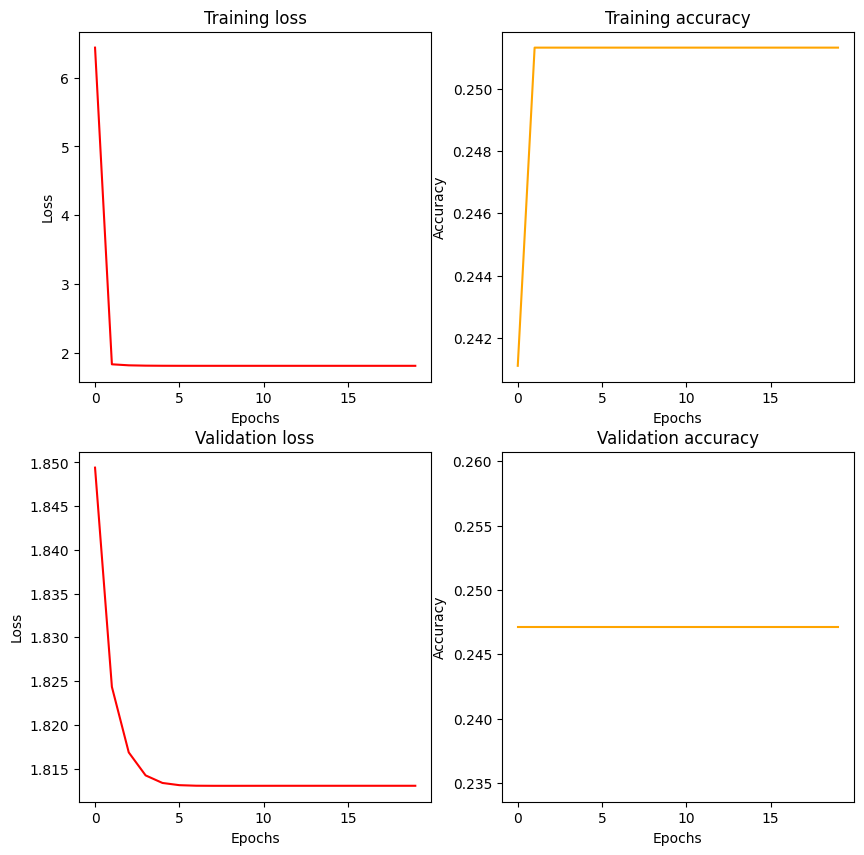

In [12]:
history = model.history # Đọc các kết quả huấn luyện mô hình qua từng epoch
train_loss, train_acc = history.history['loss'], history.history['accuracy'] # Đọc thông tin loss, acc trên tập train
val_loss, val_acc = history.history['val_loss'], history.history['val_accuracy'] # Đọc thông tin loss, acc trên tập val

plt.figure(figsize=(10, 10)) # Cài đặt kích thước khung ảnh

plt.subplot(2, 2, 1) # Khởi tạo khung ảnh cho training loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Training loss') # Hiển thị title của khung ảnh hiện tại là 'Training Loss'
plt.plot(train_loss, color='red') # Vẽ đường giá trị loss trên tập train qua từng epoch (đường vẽ màu đỏ)

plt.subplot(2, 2, 2) # Khởi tạo khung ảnh cho training acc
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Accuracy') # Hiển thị tên trục tung là 'Accuracy'
plt.title('Training accuracy') # Hiển thị title của khung ảnh hiện tại là 'Training accuracy'
plt.plot(train_acc, color='orange') # Vẽ đường giá trị accuracy trên tập train qua từng epoch (đường vẽ màu cam)

plt.subplot(2, 2, 3) # Khởi tạo khung ảnh cho val loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Validation loss') # Hiển thị title của khung ảnh hiện tại là 'Validation loss'
plt.plot(val_loss, color='red') # Vẽ đường giá trị loss trên tập val qua từng epoch (đường vẽ màu đỏ)

plt.subplot(2, 2, 4) # Khởi tạo khung ảnh cho val acc
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Accuracy') # Hiển thị tên trục tung là 'Accuracy'
plt.title('Validation accuracy') # Hiển thị title của khung ảnh hiện tại là 'Validation accuracy'
plt.plot(val_acc, color='orange') # Vẽ đường giá trị accuracy trên tập val qua từng epoch (đường vẽ màu cam)

plt.show() # Hiển thị 4 khung ảnh nhỏ